# High School Origin of Jamaica's Track & Field Athletes 

## Overview

Since 2008 Jamaica has had tremendous success in international track and field. This report looks at the high schools from which Jamaica's track and field athletes originated from. The dataset contains listed member of Jamaica's senior track and field teams at the **IAAF World Athletic Championships** and **Olympic Games**.

The data was sourced from JAA press releases in the Jamaica Obserer and the Jamaica Gleaner as well as from Wikipedia. 
Each athlete's high school was found by a Google search for article's referring to the athlete's high school as well as a search in a dataset of Champs and local track meet records. Where an athlete attended more than one schools then both schools are listed. 


## Load Data 

In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings

warnings.simplefilter('ignore')
style.use('fivethirtyeight')

In [525]:
colors = pd.read_csv('https://s3.us-east-2.amazonaws.com/jamaicatrack/Colors.csv')
senior_team = pd.read_csv('https://s3.us-east-2.amazonaws.com/jamaicatrack/JamaicaSeniorTeam.csv', encoding='utf-8')
senior_team.head(5)

,Athlete,School,PreviousSchool,Gender,Year,Meet
0,Leah Nugent,Abington Senior,NaN,Female,2017,World Champs
1,Leah Nugent,Abington Senior,NaN,Female,2016,Olympics
2,Nickiesha Wilson,Alpha,NaN,Female,2016,Olympics
3,Nickiesha Wilson,Alpha,NaN,Female,2008,Olympics
4,Nickiesha Wilson,Alpha,NaN,Female,2009,World Champs


### Handling multiple schools

Some athletes attended multiple schools so we need to add entries for their previous schools

In [526]:
previous_schools = senior_team[~senior_team.PreviousSchool.isnull()]
previous_schools.School = previous_schools.PreviousSchool
previous_schools.PreviousSchool = ''
previous_schools = previous_schools.reset_index(drop=True)
senior_team = senior_team.append(previous_schools)

Let's see if we have fixed **Leford Green** who attended Greater Portmore High and then Kingston College

In [527]:
senior_team[senior_team.Athlete=='Leford Green']

,Athlete,School,PreviousSchool,Gender,Year,Meet
153,Leford Green,Kingston College,Greater Portmore,Male,2009,World Champs
154,Leford Green,Kingston College,Greater Portmore,Male,2011,World Champs
155,Leford Green,Kingston College,Greater Portmore,Male,2012,Olympics
156,Leford Green,Kingston College,Greater Portmore,Male,2013,World Champs
157,Leford Green,Kingston College,Greater Portmore,Male,2015,World Champs
6,Leford Green,Greater Portmore,,Male,2009,World Champs
7,Leford Green,Greater Portmore,,Male,2011,World Champs
8,Leford Green,Greater Portmore,,Male,2012,Olympics
9,Leford Green,Greater Portmore,,Male,2013,World Champs
10,Leford Green,Greater Portmore,,Male,2015,World Champs


## Senior Caps By School

A **cap** is an appearance by an athlete at an Olympic or World Champs for the duration of the Games. So Usain Bolt earns 1 cap for each Olympic and World Champs he has attended.

In [528]:
cap_by_school = senior_team[['School','Athlete']].groupby('School').count().rename(columns={'Athlete':'Spots'})
cap_by_school = cap_by_school.sort_values('Spots', ascending=True)
cap_by_school_topn = cap_by_school[cap_by_school.Spots > 10].reset_index()
cap_by_school_topn ['Color'] = cap_by_school_topn.merge(colors, how='left').Color.fillna('blue')
cap_by_school_topn=cap_by_school_topn.set_index('School')

In [529]:
chart = cap_by_school_topn.plot.barh( y='Spots',  figsize = (14,9), legend=False, color=cap_by_school_topn.Color, grid=False)
chart.axes.yaxis.label.set_visible(False)
chart.axes.xaxis.label.set_visible(False)
plt.title('Jamaica Athletics Caps By School 2008-2017', fontweight='bold', fontname='Arial', fontsize=21)
chart.set_ylim(bottom=-1)
chart.text(x=0, y=-1, s=' * A cap is an appearance by an athlete for the duration of a Games' + '  ' *30,\
           fontsize=16, color='#f0f0f0', backgroundcolor='grey')
plt.yticks(fontweight='normal', fontname='Arial', size=14)
plt.tick_params( axis='x', which='both', bottom='off',  top='off', labelbottom='off') 
plt.tight_layout()

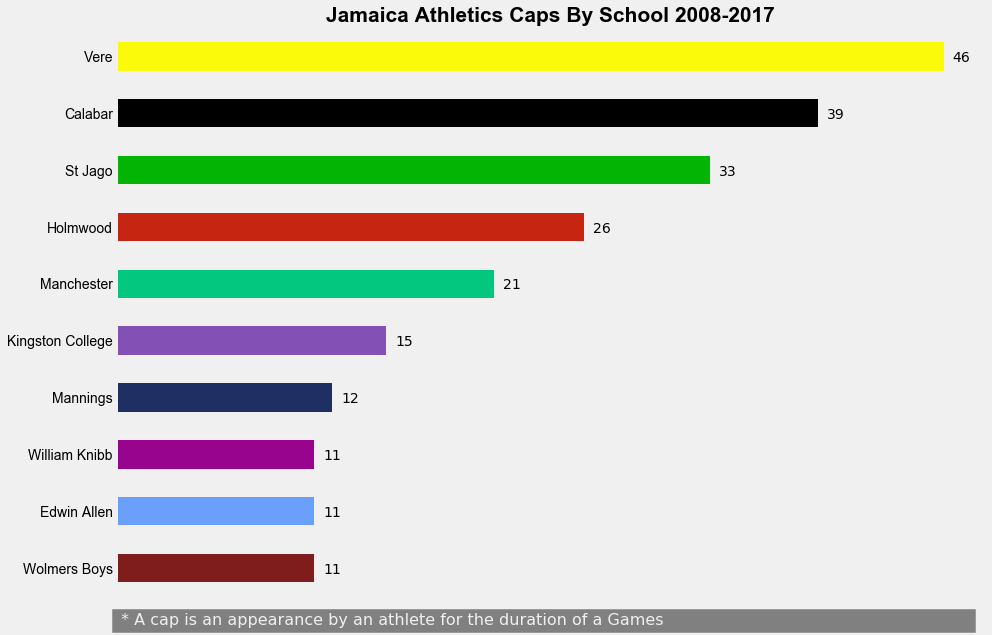

In [530]:
rects = chart.patches
for rect in rects:
    y_value = rect.get_y() + 0.1
    x_value = rect.get_width() + rect.get_height() / 2
    space = 0
    va = 'bottom'
    label = "{:.0f}".format(x_value)
    plt.annotate( label, (x_value + 0.75, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 
plt.show()

## Senior Athletes By School

Now we will look at a different measurement - **how many senior athletes have attended a given school**. In this case Usain Bolt counts as just one athlete regardless of how many caps he received.

In [531]:
athletes_by_school = senior_team[['School','Athlete']].drop_duplicates().groupby('School')\
.count().rename(columns={'Athlete':'Athletes'}).sort_values('Athletes')
athletes_by_school_topn = athletes_by_school.tail(10).reset_index()
athletes_by_school_topn ['Color'] = athletes_by_school_topn.merge(colors, how='left').Color.fillna('blue')
athletes_by_school_topn=athletes_by_school_topn.set_index('School')

In [532]:
chart = athletes_by_school_topn.plot.barh( y='Athletes',  figsize = (14,9), legend=False, color=athletes_by_school_topn.Color, grid=False)
chart.axes.yaxis.label.set_visible(False)
chart.axes.xaxis.label.set_visible(False)
plt.title("Jamaica's Senior Athletes By School 2008-2017", fontweight='bold', fontname='Arial', fontsize=21)
chart.set_ylim(bottom=-1)
chart.text(x=0, y=-1, s=' * Athletes selected for Olympic Games and World Championships ' + '  ' *30,\
           fontsize=16, color='#f0f0f0', backgroundcolor='grey')
plt.yticks(fontweight='normal', fontname='Arial', size=14)
plt.tick_params( axis='x', which='both', bottom='off',  top='off', labelbottom='off') 
plt.tight_layout()

In [533]:
rects = chart.patches
for rect in rects:
    y_value = rect.get_y() + 0.1
    x_value = rect.get_width() + rect.get_height() / 2
    space = 0
    va = 'bottom'
    label = "{:.0f}".format(x_value)
    plt.annotate( label, (x_value + 0.1, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va)

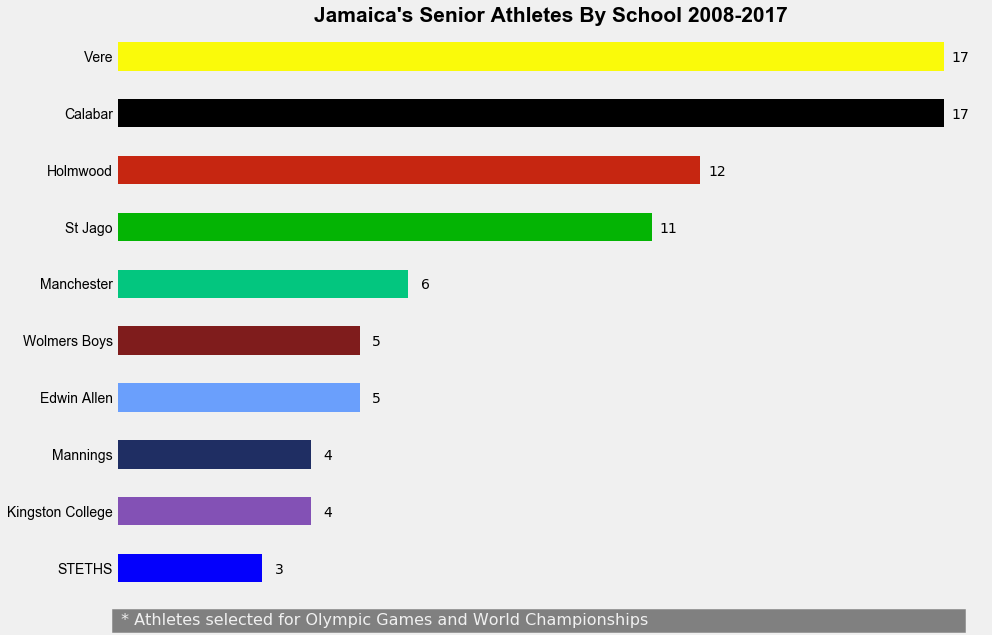

In [534]:
plt.show()

Now we see that Vere and Calabar are tied on 17 athletes each with St Jago 3rd with 11

### Vere Athletes

In [552]:
senior_team[senior_team.School=='Vere'][['School','Athlete', 'Meet','Year']]\
.drop_duplicates().groupby(['School','Athlete']).count().drop('Year', axis=1).rename(columns={'Meet':'Caps'})\
.sort_values('Caps', ascending=False)

Caps
School Athlete                      
Vere   Kimberly Williams           7
       Veronica Campbell-Brown     6
       Shereefa Lloyd              4
       Simone Facey                3
       Shericka Jackson            3
       Shaneika Thomas             3
       Shadae Lawrence             2
       Shevon Stoddart             2
       Aleen Bailey                2
       Patricia Hall               2
       Mardrea Hyman               2
       Jura Levy                   2
       Indira Spence               1
       Michael Blackwood           1
       Lacena Golding-Clarke       1
       Steve Mullings              1
       Ricardo Cunningham          1

### Calabar Athletes

In [553]:
senior_team[senior_team.School=='Calabar'][['School','Athlete', 'Meet','Year']]\
.drop_duplicates().groupby(['School','Athlete']).count().drop('Year', axis=1).rename(columns={'Meet':'Caps'})\
.sort_values('Caps', ascending=False)

Caps
School  Athlete              
Calabar Andrew Riley        5
        Dwight Thomas       4
        Warren Weir         4
        Fedrick Dacres      3
        Jason Morgan        3
        Josef Robertson     3
        Maurice Smith       3
        Javon Francis       3
        Maurice Wignall     2
        Travis Smikle       2
        Deuce Carter        1
        Jamari Rose         1
        Jason Livermore     1
        Chad Wright         1
        Nicholas Gordon     1
        Oshane Bailey       1
        Sanjay Ayre         1